In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

/home/gr0k/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [5]:
import confusion_matrix_pretty_print as cmpp

In [6]:
X_train = pd.read_csv('../subset/X_winetrain.csv', index_col=0)
X_test = pd.read_csv('../subset/X_winetest.csv', index_col=0)
y_train = pd.read_csv('../subset/y_winetrain.csv', header=None, index_col=0, squeeze=True)
y_test = pd.read_csv('../subset/y_winetest.csv', header=None, index_col=0, squeeze=True)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5197, 11)
(5197,)
(1300, 11)
(1300,)


In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
clf

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [11]:
%time clf.fit(X_train,y_train)

CPU times: user 47.5 s, sys: 121 ms, total: 47.6 s
Wall time: 13.1 s


/home/gr0k/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
metrics.accuracy_score(y_test, y_pred)

0.5546153846153846

In [14]:
y_test.value_counts()

1    654
0    399
2    247
Name: 1, dtype: int64

# Null Accuracy

In [15]:
y_test.value_counts().head(1) / y_test.count()

1    0.503077
Name: 1, dtype: float64

# Confusion Matrix

In [16]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[220 165  14]
 [115 350 189]
 [  1  95 151]]


In [17]:
df_cm = pd.DataFrame(cm)

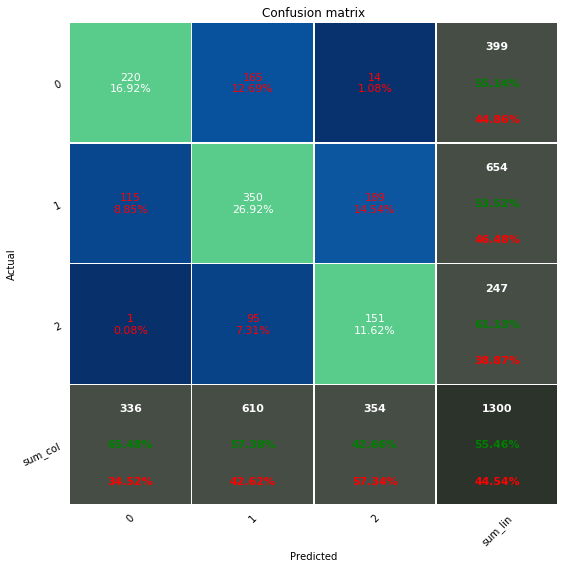

In [18]:
cmpp.pretty_plot_confusion_matrix(df_cm, cmap="Blues_r", show_null_values=1, pred_val_axis='x')

In [19]:
cm.sum(axis=1)

array([399, 654, 247])

In [20]:
np.diag(cm)

array([220, 350, 151])

In [21]:
cm.sum(axis=1) - np.diag(cm)

array([179, 304,  96])

## When Actual = Rows and Predicted = Columns
## TP: Diagonal top left to bottom right
## TN: Values in all columns and rows excluding given Class column and row
## FP: Values in column excluding TP
## FN: Values in row excluding TP

In [22]:
TP = np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TN = cm.sum() - (TP + FP + FN)

print(TP)
print(FP)
print(FN)
print(TN)

[220 350 151]
[116 260 203]
[179 304  96]
[785 386 850]


## Accuracy: How often correct?  _Diagonal / Total_

In [23]:
print(metrics.accuracy_score(y_test,y_pred))
print(TP.sum() / cm.sum())

0.5546153846153846
0.5546153846153846


## Classification Error: How often incorrect? _Non-Diagonal / Total_

In [24]:
print(1 - metrics.accuracy_score(y_test,y_pred))
print((cm.sum() - np.diag(cm).sum()) / cm.sum())

0.4453846153846154
0.4453846153846154


## Precision: When a positive value is predicted, how often is it correct? _TP / Column Total_

In [25]:
print(metrics.precision_score(y_test,y_pred, average=None))
print(TP / (TP + FP))

[0.6547619  0.57377049 0.42655367]
[0.6547619  0.57377049 0.42655367]


## Sensitivity (Recall or TPR): When actual value is positive, how often is prediction correct? _TP / Row Total_

In [26]:
print(metrics.recall_score(y_test,y_pred, average=None))
print(TP/(TP+FN))

[0.55137845 0.5351682  0.61133603]
[0.55137845 0.5351682  0.61133603]


## False Positive Rate FP / float(TN + FP)
=1 - Specificty

In [27]:
print(FP / (TN + FP))

[0.12874584 0.40247678 0.19278253]


## Specifity TN / float(TN + FP)
When the actual value is negative, how often is the prediction correct?

In [28]:
print(TN / (TN + FP))
print([1,1] - (FP / (TN + FP)))

[0.87125416 0.59752322 0.80721747]


ValueError: operands could not be broadcast together with shapes (2,) (3,) 

In [ ]:
metrics.matthews_corrcoef(y_test,y_pred)

#### https://www.researchgate.net/post/Multiclass_Confusion_Matrix_Explanation

In [ ]:
X_train.shape

In [ ]:
X = pd.read_csv('../subset/X_wine.csv', index_col=0)
y = pd.read_csv('../subset/y_wine.csv', header=None, index_col=0, squeeze=True)

print(X.shape)
print(y.shape)

In [ ]:
train_sizes = [50,520,1300,2600,3900,5196]
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [ ]:
print(train_scores)
print(validation_scores)

In [ ]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

In [ ]:
print(pd.Series(train_scores_mean, index=train_sizes))
print()
print(pd.Series(validation_scores_mean, index=train_sizes))

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [ ]:
clf.hidden_layer_sizes = (100,100)
clf

In [ ]:
train_sizes, train_scores, validation_scores = learning_curve(estimator=clf,X=X, y=y, train_sizes=train_sizes, cv=5, scoring='accuracy')

In [ ]:
train_scores_mean = train_scores.mean(axis=1)
validation_scores_mean = validation_scores.mean(axis=1)

In [ ]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation Error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for Decision Tree', fontsize = 18, y=1.03)
plt.legend()

In [ ]:
parameters = {'max_iter' : [500,1000,1500], 'alpha': 10.0 ** -np.arange(1,7),'hidden_layer_sizes':np.arange(5,12), 'random_state':[0,1,2,3,4,5,6,7,8,9]}

In [ ]:
clf_grid = GridSearchCV(clf, parameters, n_jobs=-1)

In [ ]:
clf_grid.fit(X_train,y_train)